# Superstore EDA using Python

**Name : Majangga | Email : majanggaabdullah@gmail.com | Linkedin : https://www.linkedin.com/in/majangga/**

Analyzing store sales and profit entails examining the retail establishment's performance concerning its revenue and earnings. This analysis aids businesses in pinpointing areas ripe for enhancement and leveraging data-driven insights to optimize various facets such as operations, pricing strategies, marketing endeavors, and inventory management tactics. By delving into sales and profit metrics, organizations can drive revenue growth and foster overall improvement. Therefore, if you're keen on mastering the art of store sales and profit analysis, this article serves as an invaluable resource. Through Python, we'll navigate the intricacies of this task, providing you with actionable insights and methodologies to effectively dissect and interpret store performance metrics.

# Data Source
- The data for this project has been sourced from the Kaggle platforma respected platform for sharing and discovering datasets across a wide range of fields.
- The dataset titled "Sales Forecasting" was uploaded by Rohit Sahoo and it can be accessed through the following Kaggle link:https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

# Data Description

- The dataset titled "Sales Forecasting" is a valuable repository of data, containing several important attributes that offer valuable insights into sales patterns.
- The dataset seems to provide insights into sales transactions, customer details, and product information

- Let's discover the fundamental columns, understand their significance, and grasp the types of data they hold.

**Order ID**: A unique identifier for each order placed.

**Order Date**: The date when the order was placed.

**Ship Date**: The date when the ordered items were shipped.

**Ship Mode**: The shipping mode chosen for the order (e.g., Second Class).

**Customer ID**: A unique identifier for each customer.

**Customer Name**: The name of the customer placing the order.

**Segment**: The market segment to which the customer belongs (e.g., Consumer, Corporate)

**Country**: The country where the order was placed (e.g., United States).

**City**: The city where the order was placed.

**State**: The state within the country where the order was placed.

**Postal Code**: The postal code associated with the order location.

**Region**: The region of the country where the order was placed (e.g., South, West).

**Product ID**: A unique identifier for each product.

**Category**: The broad category to which the product belongs (e.g., Furniture, Office Supplies).

**Sub-Category**: The specific sub-category to which the product belongs (e.g., Bookcases, Chairs)

**Product Name**: The name of the product ordered.

**Sales**: The sales amount associated with the order.

# Gathering, Assesing & Cleaning Data

Let’s start this task by importing the necessary Python libraries and the dataset :

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.pyplot as plt
import plotly.colors as colors
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"

data = pd.read_csv("Sample - Superstore.csv", encoding='latin-1')
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

Let’s start by looking at the descriptive statistics of the dataset:

In [2]:
print(data.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


The dataset has an order date column. We can use this column to create new columns like order month, order year, and order day, which will be very valuable for sales and profit analysis according to time periods. So let’s add these columns:

In [3]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 

data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

Let's look at the unique elements and the number of unique values in some of the columns:

In [4]:
print("Shipping modes: ")
print(data['Ship Mode'].unique())
print("Countries: ")
print(data['Country'].unique())
print('Number of states: ' + str(data['State'].nunique()))
print("Region: ")
print(data['Region'].unique())
print('Number of cities: ' + str(data['City'].nunique()))
print("Categories: ")
print(data['Category'].unique())
print("Number of Sub categories: " + str(data['Sub-Category'].nunique()))
print("Number of Products: " + str(data['Product ID'].nunique()))

Shipping modes: 
['Second Class' 'Standard Class' 'First Class' 'Same Day']
Countries: 
['United States']
Number of states: 49
Region: 
['South' 'West' 'Central' 'East']
Number of cities: 531
Categories: 
['Furniture' 'Office Supplies' 'Technology']
Number of Sub categories: 17
Number of Products: 1862


check whether there are null values:

In [5]:
print(data.isnull().sum())
print(f'There is a total of {data.isnull().sum().sum()/data.shape[0] * 100} NaN values')

Row ID               0
Order ID             0
Order Date           0
Ship Date            0
Ship Mode            0
Customer ID          0
Customer Name        0
Segment              0
Country              0
City                 0
State                0
Postal Code          0
Region               0
Product ID           0
Category             0
Sub-Category         0
Product Name         0
Sales                0
Quantity             0
Discount             0
Profit               0
Order Month          0
Order Year           0
Order Day of Week    0
dtype: int64
There is a total of 0.0 NaN values


here we will extract and create a new column called delivery days:

In [6]:
# Data extraction - creation of new columns:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month_name()
data['Day'] = data['Order Date'].dt.day
data['Year-Month'] = data['Year'].astype(str) + '-' + data['Month'].astype(str)
data['Year-Month'] = pd.to_datetime(data['Year-Month'], format='%Y-%B')

#delivery day
data['Delivery Days'] = data['Ship Date'] - data['Order Date']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Row ID             9994 non-null   int64          
 1   Order ID           9994 non-null   object         
 2   Order Date         9994 non-null   datetime64[ns] 
 3   Ship Date          9994 non-null   datetime64[ns] 
 4   Ship Mode          9994 non-null   object         
 5   Customer ID        9994 non-null   object         
 6   Customer Name      9994 non-null   object         
 7   Segment            9994 non-null   object         
 8   Country            9994 non-null   object         
 9   City               9994 non-null   object         
 10  State              9994 non-null   object         
 11  Postal Code        9994 non-null   int64          
 12  Region             9994 non-null   object         
 13  Product ID         9994 non-null   object       

In [7]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416


Store sales and profit analysis help businesses identify areas for improvement and make data-driven decisions to optimize their operations, pricing, marketing, and inventory management strategies to drive revenue and growth.

In [8]:
#sorting sales of sub_category
sub_category_sales = pd.DataFrame(data.groupby('Sub-Category')['Sales'].sum())
sub_sales = pd.DataFrame(sub_category_sales.sort_values('Sales', ascending=False))
sub_sales

Sales
Sub-Category             
Phones        330007.0540
Chairs        328449.1030
Storage       223843.6080
Tables        206965.5320
Binders       203412.7330
Machines      189238.6310
Accessories   167380.3180
Copiers       149528.0300
Bookcases     114879.9963
Appliances    107532.1610
Furnishings    91705.1640
Paper          78479.2060
Supplies       46673.5380
Art            27118.7920
Envelopes      16476.4020
Labels         12486.3120
Fasteners       3024.2800

we will see sales based on existing categories:

In [9]:
#adding sales by category
category = data.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum()
category

Sales       Profit  Quantity
Category                                           
Furniture        741999.7953   18451.2728      8028
Office Supplies  719047.0320  122490.8008     22906
Technology       836154.0330  145454.9481      6939

Here are the states with the highest to lowest profit:

In [10]:
state = data.groupby(['State'])[['Profit', 'Sales']].sum().reset_index().sort_values(by='Profit', ascending=False)
state

State      Profit        Sales
3             California  76381.3871  457687.6315
30              New York  74038.5486  310876.2710
45            Washington  33402.6517  138641.2700
20              Michigan  24463.1876   76269.6140
44              Virginia  18597.9504   70636.7200
12               Indiana  18382.9363   53555.3600
9                Georgia  16250.0433   49095.8400
15              Kentucky  11199.6966   36591.7500
21             Minnesota  10823.1874   29863.1500
6               Delaware   9977.3748   27451.0690
28            New Jersey   9772.9138   35764.3120
47             Wisconsin   8401.8004   32114.6100
37          Rhode Island   7285.6293   22627.9560
18              Maryland   7031.1788   23705.5230
19         Massachusetts   6785.5016   28634.4340
23              Missouri   6436.2105   22205.1500
0                Alabama   5786.8253   19510.6400
34              Oklahoma   4853.9560   19683.3900
2               Arkansas   4008.6871   11678.1300
5            Connecticut   3511.4918   13384.3570
26                Nevada   3316.7659   16729.1020
22           Mississippi   3172.9762   10771.3400
42                  Utah   2546.5335   11220.0560
43               Vermont   2244.9783    8929.3700
16             Louisiana   2196.1023    9217.0300
25              Nebraska   2037.0942    7464.9300
24               Montana   1833.3285    5589.3520
38        South Carolina   1769.0566    8481.7100
27         New Hampshire   1706.5028    7292.5240
13                  Iowa   1183.8119    4579.7600
29            New Mexico   1157.1161    4783.5220
7   District of Columbia   1059.5893    2865.0200
14                Kansas    836.4435    2914.3100
10                 Idaho    826.7231    4382.4860
17                 Maine    454.4862    1270.5300
39          South Dakota    394.8283    1315.5600
32          North Dakota    230.1497     919.9100
46         West Virginia    185.9216    1209.8240
48               Wyoming    100.1960    1603.1360
35                Oregon  -1190.4705   17431.1500
8                Florida  -3399.3017   89473.7080
1                Arizona  -3427.9246   35282.0010
40             Tennessee  -5341.6936   30661.8730
4               Colorado  -6527.8579   32108.1180
31        North Carolina  -7490.9122   55603.1640
11              Illinois -12607.8870   80166.1010
36          Pennsylvania -15559.9603  116511.9140
33                  Ohio -16971.3766   78258.1360
41                 Texas -25729.3563  170188.0458

we want to see which customers place the most orders:

In [11]:
# Which customers have made the highest number of orders?
high_order =data['Customer ID'].value_counts().idxmax()
name = data[data['Customer ID'] == high_order][['Customer ID','Customer Name']].drop_duplicates()
name

Customer ID  Customer Name
2133    WB-21850  William Brown

In [12]:
customer_order_counts = data.groupby('Customer Name')['Order ID'].nunique()
frequents = customer_order_counts[customer_order_counts > 10]
num_frequents = len(frequents)
print("Number of frequent customers (with more than 10 orders):", num_frequents)

Number of frequent customers (with more than 10 orders): 49


In [13]:
frequents

Customer Name
Anna Häberlin           12
Bart Pistole            12
Ben Ferrer              11
Bill Donatelli          12
Brian Moss              11
Carlos Soltero          11
Chloris Kastensmidt     13
Chris Cortes            12
Chris Selesnick         12
Christine Sundaresam    11
Clay Ludtke             12
Clytie Kelty            11
Damala Kotsonis         12
Dean percer             11
Edward Hooks            12
Emily Phan              17
Erin Ashbrook           13
George Bell             11
Greg Tran               11
Guy Armstrong           11
Henry Goldwyn           12
James Galang            11
Jeremy Farry            11
Joel Eaton              13
John Lee                11
Jonathan Doherty        11
Keith Dawkins           12
Ken Black               12
Ken Lonsdale            12
Laura Armstrong         11
Lena Creighton          12
Matt Abelman            11
Michael Moore           11
Muhammed Yedwab         11
Noel Staavos            13
Patrick Gardner         13
Patrick O'Bril

# Data Visualization

Here we will try to see what visualisations can be displayed. first I tried to see the monthly sales analysis:

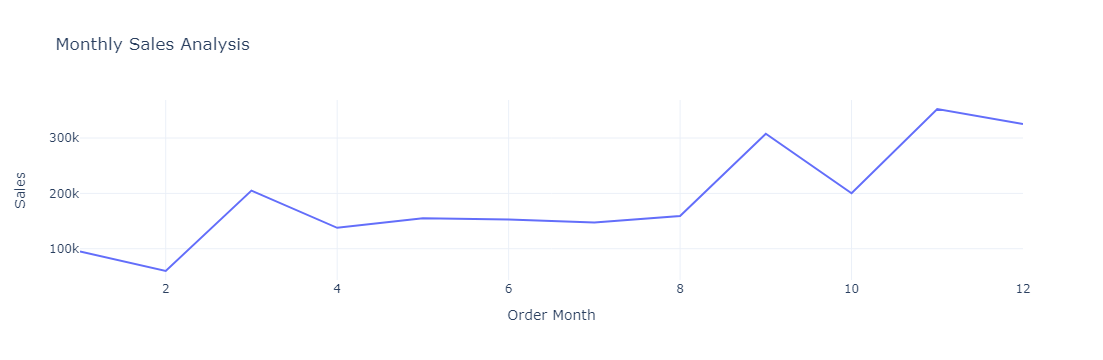

In [14]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
fig = px.line(sales_by_month, 
              x='Order Month', 
              y='Sales', 
              title='Monthly Sales Analysis')
fig.show()

It can be seen that there are some decreases and increases in sales in certain months. The most striking example is the decrease in month 2 and the increase in sales in month 11.

next I tried to create a visualisation of sales by category:

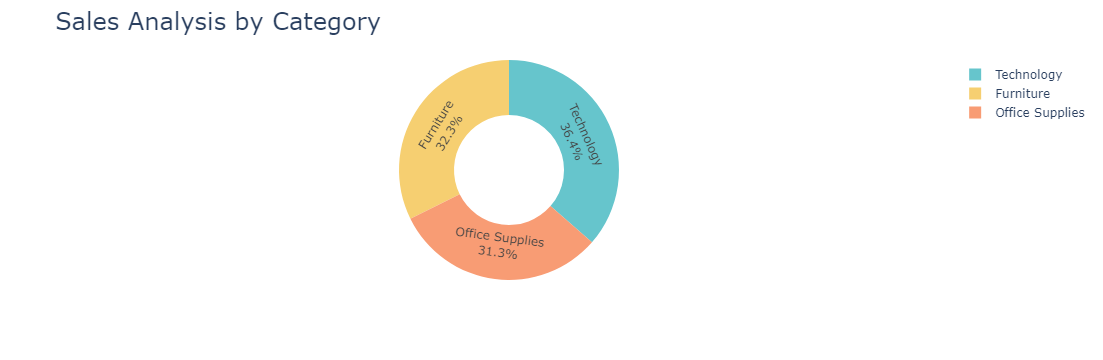

In [15]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()


fig = px.pie(sales_by_category, 
             values='Sales', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()

It can be seen that the sales comparison in the existing categories is quite even, but the technology category is superior in terms of sales and the lowest office supplies.

now let's look more specifically at sales in terms of sub-categories:

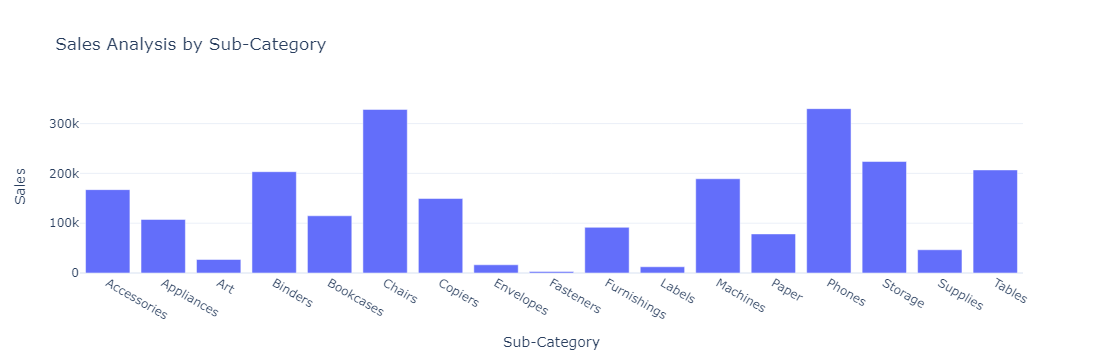

In [16]:
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(sales_by_subcategory, 
             x='Sub-Category', 
             y='Sales', 
             title='Sales Analysis by Sub-Category')
fig.show()

From the visualisation above, it can be clearly seen which sub-category sells the most and which sells the least. The mobile phone sub-category has the highest sales and the lowest is the fasteners sub-category.

Next, let's try to see how the monthly profit is:

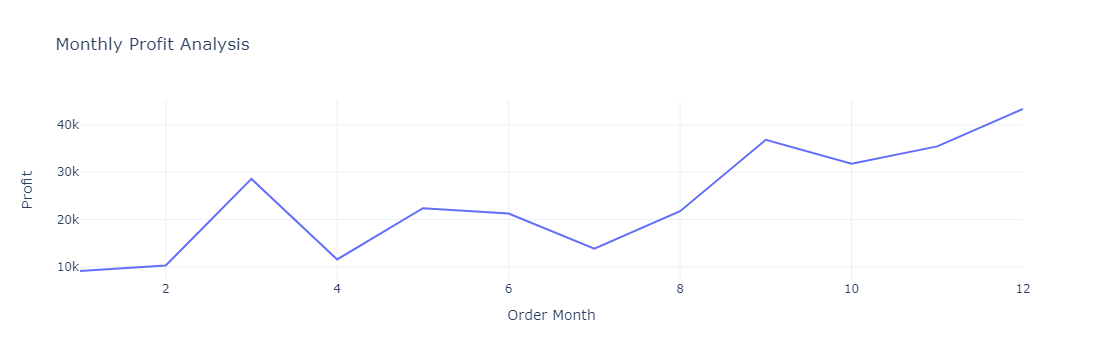

In [17]:
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()
fig = px.line(profit_by_month, 
              x='Order Month', 
              y='Profit', 
              title='Monthly Profit Analysis')
fig.show()

It can be seen that in months 3, 9 and 12 there was an increase in profit, but in months 4 and 7 there was a decrease in profit.

now let's look at the profit per category:

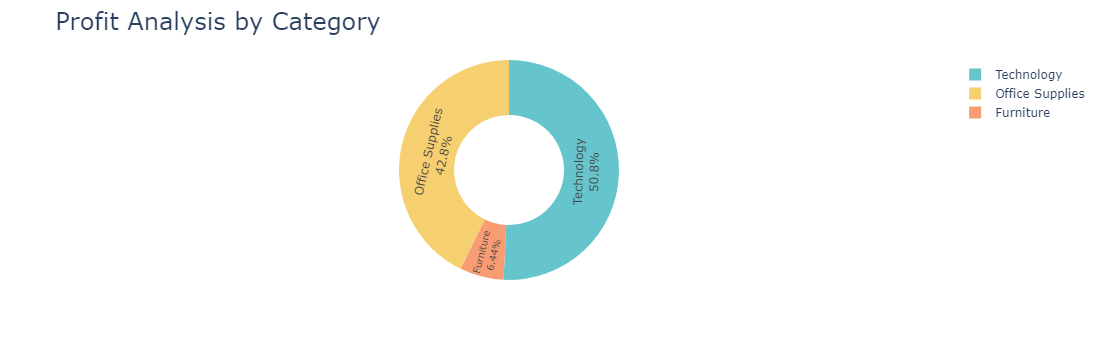

In [18]:
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

fig = px.pie(profit_by_category, 
             values='Profit', 
             names='Category', 
             hole=0.5, 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Profit Analysis by Category', title_font=dict(size=24))

fig.show()

Here we can see, that surprisingly from the visualisation above, the technology category has 50.8% more profit, followed by office supplies 42.8%, and the furniture category only 6.44%. This shows that good sales do not necessarily mean good profits.

Next, let's take a more detailed look at the sub-category profits:

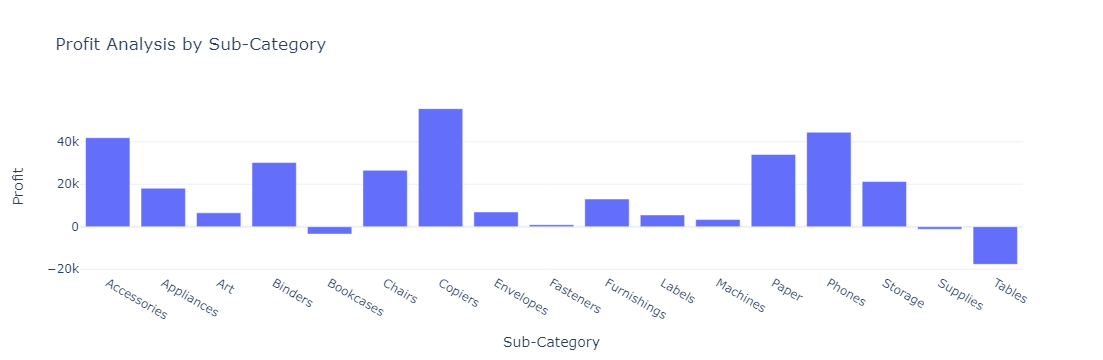

In [19]:
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(profit_by_subcategory, x='Sub-Category', 
             y='Profit', 
             title='Profit Analysis by Sub-Category')
fig.show()

From the visualisation above, we find that the sub-category with the highest profit is copiers. but we find a minus profit in the sub-category of bookcases and tables. even though the sales of these 2 sub-categories are quite a lot.

next I will try to see the sales and profit by customer segments:

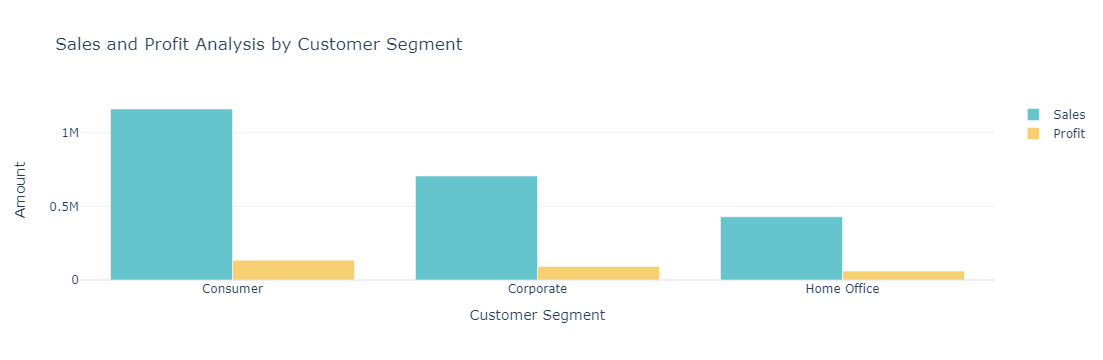

In [20]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=sales_profit_by_segment['Segment'], 
                     y=sales_profit_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()

We can see that cunsomer sales are the highest, followed by corporate and home office. But for profit, all three are low, not proportional to sales.

Distribution of numerical data refers to the way the values in a dataset are spread or distributed. It includes information on how often certain values occur, where the centre points or centres of the data lie, and how far or close they are from the centre.

Here we will look at the distribution of numerical data from sales, discount, deliverydays, quantity and profit.

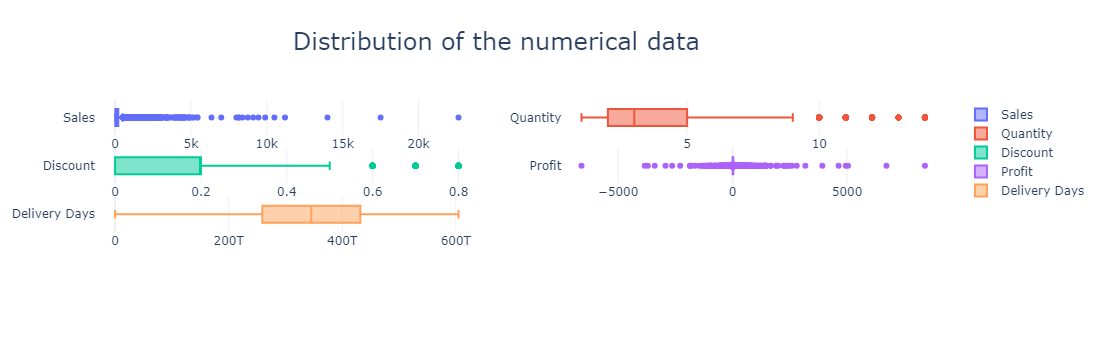

In [21]:
# Plot distribution of the Numerical columns
sales = go.Box(x=data['Sales'],name='Sales')
Quantity = go.Box(x=data['Quantity'],name='Quantity')
Discount = go.Box(x=data['Discount'],name='Discount')
Profit = go.Box(x=data['Profit'],name='Profit')
Delivery_days = go.Box(x=data['Delivery Days'],name='Delivery Days')


fig = make_subplots(rows=4, cols=2)
fig.append_trace(sales, row = 1, col = 1)
fig.append_trace(Quantity, row = 1, col = 2)
fig.append_trace(Discount, row = 2, col = 1)
fig.append_trace(Profit, row = 2, col = 2)
fig.append_trace(Delivery_days, row = 3, col = 1)
fig.update_layout(
    title_text = 'Distribution of the numerical data',
    title_font_size = 24,
    title_x=0.45)

fig.show()

Distribution of the Categorical columns refers to the way the values in the categorical columns of a dataset are distributed. It includes information about the number of occurrences of each category or category value, the proportion of each category to the total, as well as the way the categories are distributed in the dataset.

In data analysis, understanding the distribution of categorical columns is important as it can provide insight into the variation and frequency of each category in the dataset. The distribution of categorical columns can help identify dominant categories, less frequent categories, as well as the relationship between the categorie

Here we will try to see the distribution of the categorical columns of ship mode, segment, region and category.s.

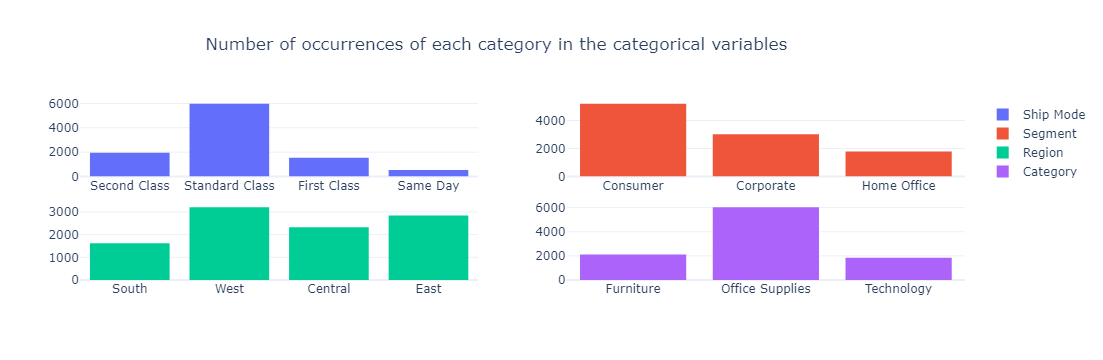

In [22]:
# Plot distribution of the Categorial columns
ship_mode = go.Histogram(x=data["Ship Mode"],name="Ship Mode")
segment = go.Histogram(x=data["Segment"],name="Segment")
Region = go.Histogram(x=data["Region"],name="Region")
category = go.Histogram(x=data["Category"],name="Category")

fig = make_subplots(rows=2, cols=2)
fig.append_trace(ship_mode, row = 1, col = 1)
fig.append_trace(segment, row = 1, col = 2)
fig.append_trace(Region, row = 2, col = 1)
fig.append_trace(category, row = 2, col = 2)
fig.update_layout(
    title_text = 'Number of occurrences of each category in the categorical variables',
    title_x=0.45
)

fig.show()

Next, I would like to take a look at the top 10 sales distribution from states.

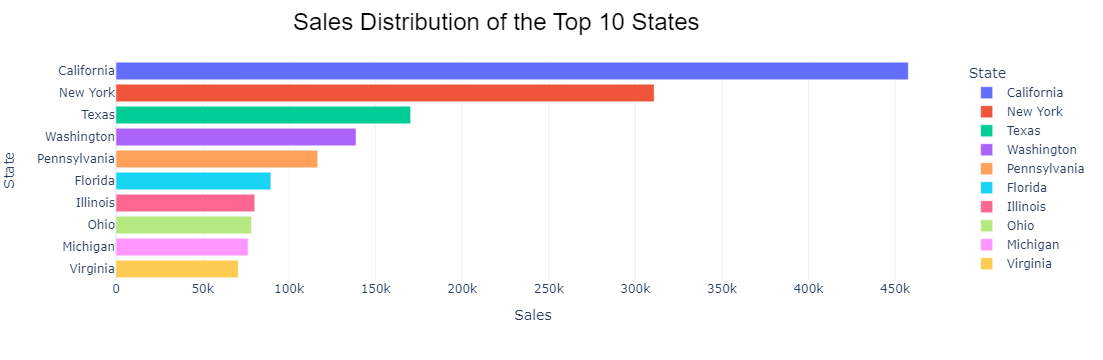

In [23]:
state_sales = data.groupby('State')['Sales'].sum().reset_index()
state_sales_sorted = state_sales.sort_values(by='Sales', ascending=False)
top_10_states = state_sales_sorted.head(10)
fig = px.bar(top_10_states, x='Sales', y='State', orientation='h',color='State')
fig.update_layout(title="Sales Distribution of the Top 10 States",title_x=0.45,width=1300,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Here we can see that there are 10 states with the most sales distribution, starting from California, New York, Texas, to the last one, Virginia.

Next, I was curious about what products were sold the most, here are the results:

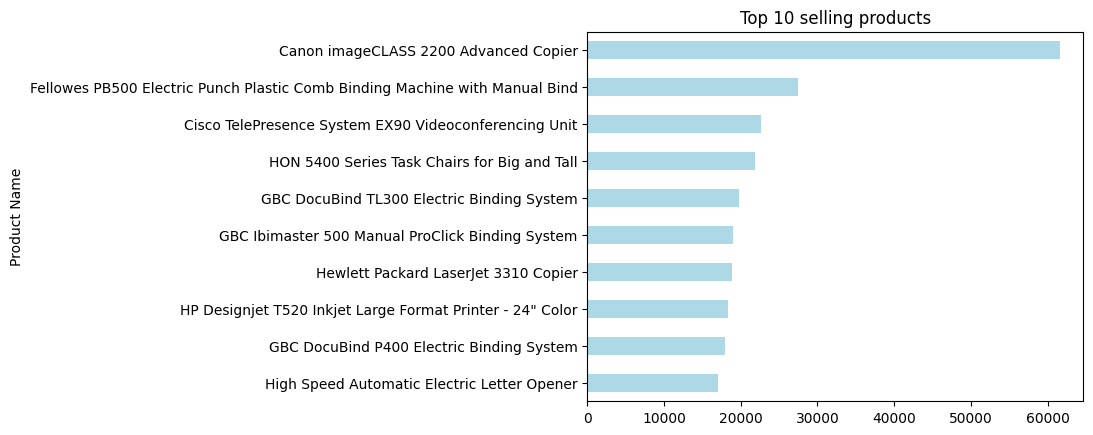

In [24]:
#Top selling products
data.groupby('Product Name')['Sales'].sum().sort_values(ascending=True).tail(10).plot.barh(color='lightblue', title='Top 10 selling products')
fig.update_layout(title='Sales by Day of the Week over the years',title_x=0.45,width=1300,title_font=dict(size=30, family="Arial", color="black"))
plt.show()

Here we take a look at some of the top-selling products, ranging from the Canon imageCLASS 2200 Advanced Copier, Fellowers PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind, to lastly the High Speed Automatic Electric Letter Opener.

Besides sales, I also want to see the most profit distribution from the existing states, and here is the visualisation:

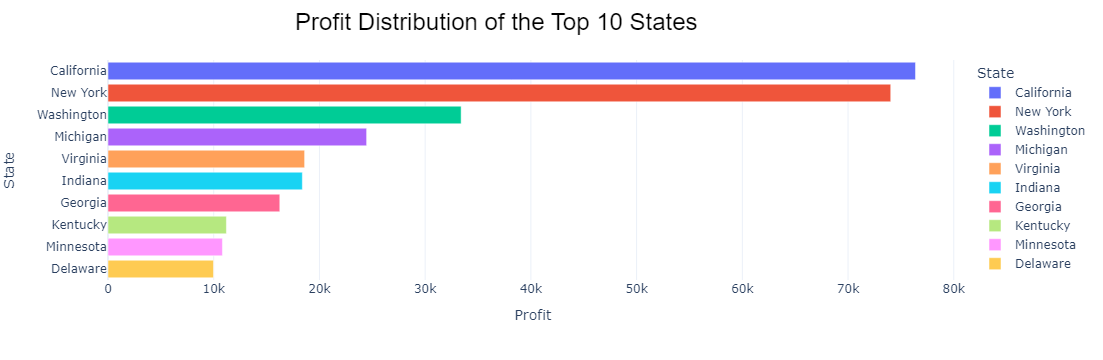

In [25]:
state_sales = data.groupby('State')['Profit'].sum().reset_index()

# Find the state with the highest sales
state_with_highest_sales = state_sales[state_sales['Profit'] == state_sales['Profit'].max()]
state_sales_sorted = state_sales.sort_values(by='Profit', ascending=False)
top_10_states = state_sales_sorted.head(10)
fig = px.bar(top_10_states, x='Profit', y='State', orientation='h',color='State')
fig.update_layout(title="Profit Distribution of the Top 10 States",title_x=0.45,width=1300,title_font=dict(size=24, family="Arial", color="black"))
fig.show()

Here we look at the 10 states that have the most profit distribution, starting with California, New York, Washington, and finally Delaware.

Finally, I am curious about customers who place orders more than 10 times, here I try to visualise it and the results are as follows:

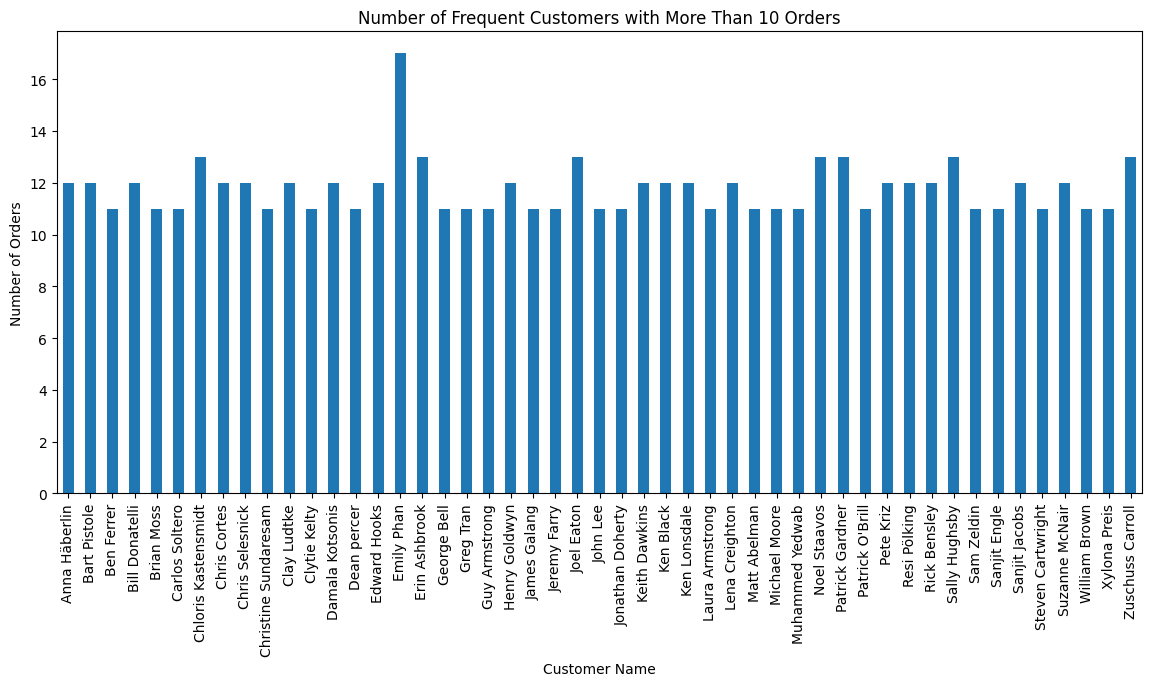

In [26]:
plt.figure(figsize=(14, 6))
frequents.plot(kind='bar')
plt.title('Number of Frequent Customers with More Than 10 Orders')
plt.xlabel('Customer Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

As can be seen from the visualisation above, there are quite a lot of customers who place orders more than 10 times.

Analyzing store sales and profit is essential for businesses to pinpoint areas for enhancement and make informed decisions using data. By optimizing operations, pricing, marketing, and inventory management strategies, businesses can drive revenue growth and foster expansion. I trust you found this article on store sales and profit analysis using Python insightful and valuable. Thank you, and I hope it proves beneficial to you.